In [1]:
ls

Aggregation.txt              animation.gif             pogo.ipynb
Aggregation.txt12frames.gif  animation.mp4             R15.txt
Aggregation.txt20frames.gif  Compound.txt              R15.txt22frames.gif
Aggregation.txt22frames.gif  Compound.txt22frames.gif  README.md
Aggregation.txt3frames.gif   D31.txt                   spiral20frames.mp4
animation-400.mp4            D31.txt22frames.gif       spiral40frames.mp4
animation-b.mp4              jain40frames.mp4          spiral.txt
animation-c.mp4              jain.txt                  spiral.txt20frames.gif
animation-d.mp4              jain.txt20frames.gif      spiral.txt5frames.gif


In [2]:
import numpy as np
import pandas as pd
import gudhi

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection

In [4]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import os.path

In [28]:
from urllib.request import urlopen
from urllib.parse import urlparse

In [5]:
%matplotlib inline

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [100]:
urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.txt', 'https://cs.joensuu.fi/sipu/datasets/pathbased.txt','https://cs.joensuu.fi/sipu/datasets/a1.txt','https://cs.joensuu.fi/sipu/datasets/R15.txt']

In [113]:
url= urls[0]
print(url)
parse = urlparse(url)
filename = parse.path.strip('/').split('/')[-1]
raw_data = urlopen(url)
data = np.loadtxt(raw_data)

print(data.shape)
print(data[1:20])


https://cs.joensuu.fi/sipu/datasets/overlap.txt
(1000, 2)
[[1969. 2274.]
 [1876. 2024.]
 [2040. 2273.]
 [2027. 2286.]
 [1725. 2193.]
 [1701. 2270.]
 [1605. 1982.]
 [2340. 2565.]
 [1779. 2300.]
 [1945. 2457.]
 [1944. 2491.]
 [1671. 2335.]
 [2228. 2374.]
 [2010. 2353.]
 [1766. 2254.]
 [2050. 2490.]
 [1665. 2068.]
 [1728. 2200.]
 [1946. 2472.]]


In [114]:
#iris = load_iris()
#X = iris.data
#y = iris.target

In [115]:
print(filename)

#y = data[:,2]
#print(y.shape)
X = data[:,:2]
print(X.shape)
print(data)

overlap.txt
(1000, 2)
[[1965. 2300.]
 [1969. 2274.]
 [1876. 2024.]
 ...
 [1848. 2645.]
 [2229. 2524.]
 [2232. 2127.]]


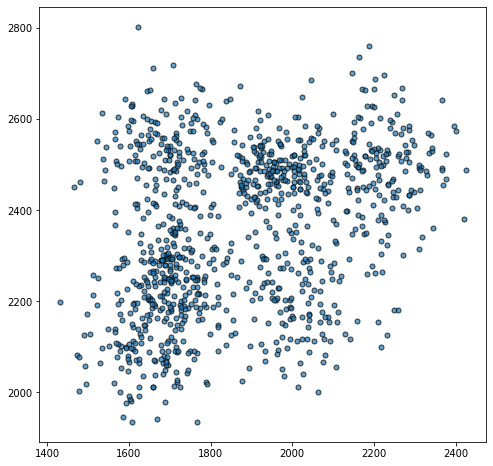

In [117]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [118]:
rips_complex = gudhi.RipsComplex(points=X)


In [119]:

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)


#for i in simplex_tree.get_filtration():
#    print(i)
    
print(simplex_tree.num_vertices() , 'vertices')  
print(simplex_tree.num_simplices(), 'simplices')
print('dimension:', simplex_tree.dimension())


1000 vertices
500500 simplices
dimension: 1


In [120]:
diag = simplex_tree.persistence()

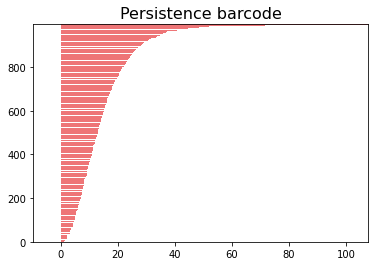

In [122]:
gudhi.plot_persistence_barcode(diag)
plt.show()

In [126]:
#move through list and assign clusters to conected components
point_dict={i:0 for i in range(simplex_tree.num_vertices())}
counter=0
cluster_dict_list = []

for simplex in simplex_tree.get_filtration():
    if len(simplex[0])>1:    
        if all(value > 0 for value in list(point_dict.values())):
            if len(np.unique(np.array(list(point_dict.values())))) == 1:
                print('break')
                print(simplex)
                print(simplex[1])
                simplex_tree.prune_above_filtration(simplex[1])
                break


        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] == 0:
            counter += 1
            point_dict[simplex[0][0]] = counter
            point_dict[simplex[0][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] != 0:
            point_dict[simplex[0][0]] = point_dict[simplex[0][1]]

            #and vice versa
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] == 0:
            point_dict[simplex[0][1]] = point_dict[simplex[0][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] != 0 and point_dict[simplex[0][0]] != point_dict[simplex[0][1]]:
            larger_cluster_number = max(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            smaller_cluster_number = min(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())


break
([37, 846], 97.86214794290998)
97.86214794290998


In [127]:
len(np.unique(np.array(list(point_dict.values()))))

1

In [128]:
length = len(cluster_dict_list)
length

37085

In [130]:
print(simplex_tree.num_simplices(), 'simplices')


38088 simplices


In [139]:
print(np.unique(cluster_dict_list[-1].values())) #penultimate clustering has 2 clusters
#cluster_dict_list[-1] #last clustering finally merges to all one cluster

[dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [140]:
#convert the simplex tree to a pandas dataframe
df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])

In [141]:
df = df[:len(cluster_dict_list)]
df

simplex   distance
0             [0]   0.000000
1             [1]   0.000000
2             [2]   0.000000
3             [3]   0.000000
4             [4]   0.000000
...           ...        ...
37080  [316, 628]  96.213305
37081  [702, 741]  96.213305
37082  [198, 798]  96.213305
37083  [174, 867]  96.213305
37084  [426, 894]  96.213305

[37085 rows x 2 columns]

In [142]:
#find the gaps between birth/death pairs
df['gaps'] = df['distance'] - df['distance'].shift(1)

In [143]:
#find normalized distance
scaler = MinMaxScaler()
df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

In [144]:
df['normed_gaps'] = df['gaps'] * df['normed_distance']

In [145]:
gap_sum = df['normed_gaps'].sum()
#print(sum)
df['probability_vector'] = df['normed_gaps'] / gap_sum

In [146]:
df['probability_vector'][1:]

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
37080    0.0
37081    0.0
37082    0.0
37083    0.0
37084    0.0
Name: probability_vector, Length: 37084, dtype: float64

In [147]:
sum(df['probability_vector'][1:])

1.0000000000000004

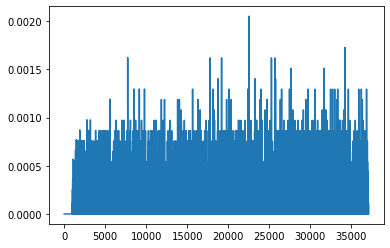

In [148]:
plt.plot(df['probability_vector'])

In [149]:
marker = 0
print(marker)
for i in range(length):
    if cluster_dict_list[i] == cluster_dict_list[i+1]:
        #assign value in prob vector to prob_vector[marker]
        df.loc[:,'probability_vector'].iloc[marker] += df.loc[:,'probability_vector'].iloc[i]
        df.loc[:,'probability_vector'].iloc[i] = 0
    else:
        marker = i
        print(marker)

0


<ipython-input-149-2c59f190f668>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'probability_vector'].iloc[marker] += df.loc[:,'probability_vector'].iloc[i]
<ipython-input-149-2c59f190f668>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'probability_vector'].iloc[i] = 0


KeyboardInterrupt: 

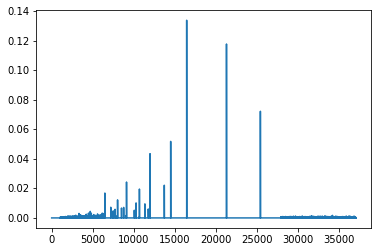

In [150]:
plt.plot(df['probability_vector'])

In [151]:
candidates = list(df.nlargest(length,['probability_vector']).index)

In [152]:
candidates

[16449,
 21301,
 25432,
 14500,
 11986,
 9121,
 13725,
 10693,
 6483,
 8030,
 10285,
 11358,
 7200,
 8771,
 8509,
 11772,
 7723,
 10069,
 7499,
 4704,
 4828,
 6166,
 4484,
 3333,
 6384,
 5588,
 6279,
 4218,
 5122,
 3519,
 5959,
 5771,
 2936,
 4136,
 5305,
 6071,
 34218,
 5899,
 5822,
 9074,
 5552,
 5049,
 31658,
 1991,
 3195,
 2615,
 3800,
 3595,
 3948,
 7961,
 2163,
 2306,
 2780,
 3305,
 2478,
 4036,
 2845,
 3726,
 4382,
 5722,
 4983,
 29702,
 30543,
 32458,
 32705,
 32960,
 33325,
 34626,
 35889,
 36207,
 36842,
 3906,
 5429,
 29451,
 33254,
 36327,
 5366,
 29146,
 31445,
 31808,
 31882,
 34093,
 34154,
 1670,
 4427,
 4583,
 5477,
 28155,
 28500,
 29001,
 30223,
 30468,
 30876,
 31593,
 32054,
 33348,
 33502,
 33528,
 33663,
 33954,
 34796,
 35471,
 36395,
 1882,
 1821,
 2244,
 4006,
 5275,
 4615,
 7453,
 27943,
 28187,
 28275,
 28440,
 28654,
 28811,
 28866,
 29353,
 29437,
 29476,
 29806,
 29868,
 29935,
 30292,
 30345,
 30689,
 30860,
 31020,
 31184,
 31254,
 31508,
 32217,
 32363

In [190]:
idx = candidates[23] +1
idx

3334

In [191]:
print(df.loc[:,'probability_vector'][idx-1])
print('percent confidence')
'{:.1%}'.format(df.loc[:,'probability_vector'][idx-1])

0.0030282768781754745
percent confidence


'0.3%'

In [192]:
np.array(list(cluster_dict_list[idx].values()))

array([ 27,  27,   0,  27,  27,   2,   2,  51, 186,   2,   3,   3,   2,
       137,  27,   2,   3,   2,   2,   3,   3,  27,   3,   0,  12,   3,
         3,  27,  27,  12,   3,  12,   2,   0,   2,   1,   3,  12, 279,
        27,   2,  12,   3,   3,   3,   3,  12, 251,  12, 176,   2, 149,
        12,  31,   2,   3,  27, 294,   1,   3,   3,   2,   2, 197,   3,
       288,   3, 113,  12,   3,  27, 245,   1,  27,  82,   2,   3,  27,
         2,   3,   2,  12,   2,   3,   3,   3,   3,   2, 113,   0,   3,
         2,   2,   3,   2,   3,  12,  12,  12,   3,   3,   3, 134,   3,
        27,   2,   3, 226,   2,   2, 245,   3, 267,  79,   0,   3,   3,
         3,   2, 113,   2,  12,   2,   2,   3,   3,   3,   2, 280,   3,
        12,   3,   2,   3, 149,  12,  12,  12, 149,  51,   2,   0,   3,
        12,   3,   0,   2,   3,   3, 238,   3,  27,   3,   0,  12, 149,
         2,  12,  12,   2,   2,   3,   2,   3,   0,   3,   3,   3,   3,
         2,   2,  12,   0,   3,   0,   3, 297,   3,  51,   3,   

In [193]:
np.array(list(cluster_dict_list[idx].values()))

array([ 27,  27,   0,  27,  27,   2,   2,  51, 186,   2,   3,   3,   2,
       137,  27,   2,   3,   2,   2,   3,   3,  27,   3,   0,  12,   3,
         3,  27,  27,  12,   3,  12,   2,   0,   2,   1,   3,  12, 279,
        27,   2,  12,   3,   3,   3,   3,  12, 251,  12, 176,   2, 149,
        12,  31,   2,   3,  27, 294,   1,   3,   3,   2,   2, 197,   3,
       288,   3, 113,  12,   3,  27, 245,   1,  27,  82,   2,   3,  27,
         2,   3,   2,  12,   2,   3,   3,   3,   3,   2, 113,   0,   3,
         2,   2,   3,   2,   3,  12,  12,  12,   3,   3,   3, 134,   3,
        27,   2,   3, 226,   2,   2, 245,   3, 267,  79,   0,   3,   3,
         3,   2, 113,   2,  12,   2,   2,   3,   3,   3,   2, 280,   3,
        12,   3,   2,   3, 149,  12,  12,  12, 149,  51,   2,   0,   3,
        12,   3,   0,   2,   3,   3, 238,   3,  27,   3,   0,  12, 149,
         2,  12,  12,   2,   2,   3,   2,   3,   0,   3,   3,   3,   3,
         2,   2,  12,   0,   3,   0,   3, 297,   3,  51,   3,   

In [194]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')

50
your dataset appears to have 50 clusters, not including any outliers


In [195]:
true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

ValueError: Found input variables with inconsistent numbers of samples: [300, 1000]

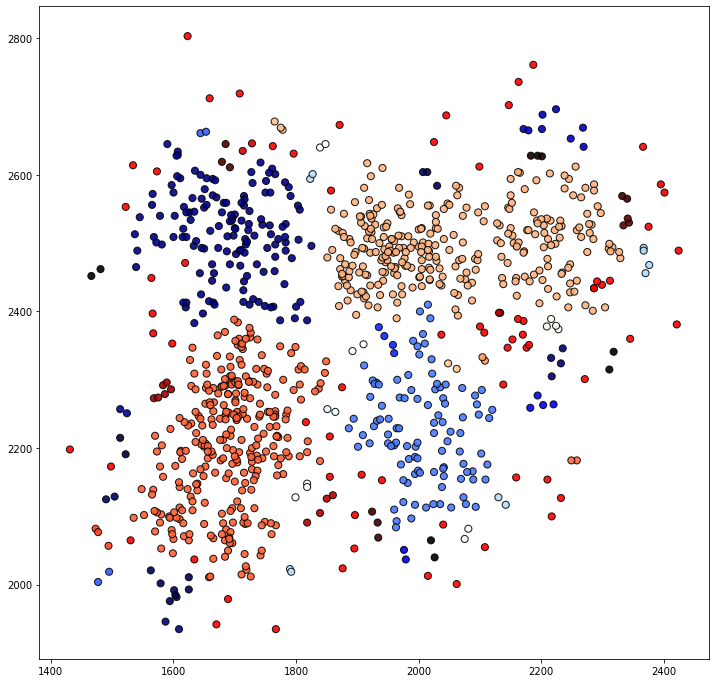

In [196]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=np.array(list(cluster_dict_list[idx].values())),
            marker="o",
            cmap='flag',
            norm=None,
            alpha=.9,
            edgecolor="k")

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
frames = len(candidates)


outfile = filename + str(frames) + 'frames.gif'

if os.path.isfile(outfile):
    def init():
        scatter = ax.scatter(X[:, 0], X[:, 1],
                        s=40, 
                        c=np.array(list(cluster_dict_list[0].values())),
                        marker="o",
                        cmap='rainbow',
                        norm=None,
                        alpha=1,
                        edgecolor="k")
        #ax.set(xlim=(-1, 35), ylim=(-1, 35))

        return scatter,

    #collection = PatchCollection(X, animated=True)

    #ax.add_collection(collection)
    #ax.autoscale_view(True)

    def animate(i):

        scatter = ax.scatter(X[:, 0], X[:, 1],
                    s=40, 
                    c=np.array(list(cluster_dict_list[candidates[i]].values())),
                    marker="o",
                    cmap='flag',
                    norm=None,
                    alpha=1,
                    edgecolor="k")
        return scatter,



    ani = FuncAnimation(fig, animate,interval=1000,init_func=init,frames=frames,repeat=False, blit=True)

    #ani.save('animation.gif')



    #writer=animation.PillowWriter()

    #writer = animation.FFMpegWriter(fps=2,bitrate=1000)

    ani.save(outfile, dpi=200)
    fig.show()


In [ ]:
metrics.silhouette_score(X, pred, metric="euclidean")

%%time
length = len(cluster_dict_list)-1
silhouette_scores = []

for i in range(length):
    pred = np.array(list(cluster_dict_list[i].values()))
    silhouette_scores.append(metrics.silhouette_score(X, pred, metric="euclidean"))

In [ ]:
silhouette_list = []
for i in candidates:
    silhouette = metrics.silhouette_score(X,     np.array(list(cluster_dict_list[i].values())), metric="euclidean")
    silhouette_list.append(silhouette)

In [ ]:
plt.plot(silhouette_list)

In [ ]:
#idx = silhouette_scores.index(max(silhouette_scores[simplex_tree.num_vertices():idx]))
#print(idx)

In [ ]:
rand_score_list = []
true = y
for i in range(len(cluster_dict_list)):
    pred = np.array(list(cluster_dict_list[i].values()))
    rand_score = metrics.adjusted_rand_score( true, pred)
    rand_score_list.append(rand_score)

In [ ]:
 plt.plot(rand_score_list)

In [ ]:
max(rand_score_list)

In [ ]:
rand_score_list.index(max(rand_score_list))

In [ ]:
idx = rand_score_list.index(max(rand_score_list))
print(idx)

ValueError: 'tab10b' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [ ]:
def pogo(dataset):
    rips_complex = gudhi.RipsComplex(points=dataset,max_edge_length=100)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])
    #move through list and assign clusters to conected components

    point_dict={i:0 for i in range(simplex_tree.num_vertices())}
    counter=0

    cluster_dict_list = []
    for i in range(simplex_tree.num_vertices(),len(df)):
        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            counter += 1
            point_dict[df.loc[i,'simplex'][0]] = counter
            point_dict[df.loc[i,'simplex'][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] != 0:
            point_dict[df.loc[i,'simplex'][0]] = point_dict[df.loc[i,'simplex'][1]]

            #and vice versa
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            point_dict[df.loc[i,'simplex'][1]] = point_dict[df.loc[i,'simplex'][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] != 0 and point_dict[df.loc[i,'simplex'][0]] != point_dict[df.loc[i,'simplex'][1]]:
            larger_cluster_number = max(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            smaller_cluster_number = min(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())
        #print(point_dict)
        #print('step',i)

    
    cutoff_value = 0
    for i in range(len(cluster_dict_list)):
        if cutoff_value == 0:
            if all(value != 0 for value in cluster_dict_list[i].values()):
                cutoff_value = i
                print('dataset becomes connected at simplex #',cutoff_value)
       
    df = df[:cutoff_value]
    #cluster_dict_list =
    
    #find the gaps between birth/death pairs

    df['gaps'] = df['distance'] - df['distance'].shift(1)
    
    #find normalized distance
    scaler = MinMaxScaler()
    df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

    #Mulitply the gaps by their normed location in the filtration, weighting features more heavily if they're later
    df['normed_gaps'] = df['gaps'] * df['normed_distance']

    norm_sum = df['normed_gaps'].sum()
    df['probability_vector_normed_gaps'] = df['normed_gaps'] / norm_sum
    
    gap_sum = df['gaps'].sum()
    df['probability_vector_gaps'] = df['normed_gaps'] / gap_sum

    partition = 10
    candidates = [i for i in df.nlargest(partition ,['gaps']).index if i in df.nlargest( partition,['normed_gaps']).index]
    #print('possible cuttoffs' , candidates)
    idx = cutoff_value - 1
    #idx = candidates[0]
    print('idx' ,idx)

    print('your dataset appears to have', len(np.unique(np.array(list(cluster_dict_list[idx].values())))),'clusters')

    #print( np.array(list(cluster_dict_list[idx].values())))

    print(simplex_tree.num_vertices() , 'vertices')  
    print(simplex_tree.num_simplices(), 'simplices')
    print('dimension:', simplex_tree.dimension())

    size=10
    plt.figure(figsize=(size,size))
    plt.scatter(dataset[:, 0], dataset[:, 1],
                s=30, 
                c=np.array(list(cluster_dict_list[idx].values())),
                marker="o",
                cmap='rainbow',
                norm=None,
                alpha=.9,
                edgecolor="k")
    
    return cluster_dict_list, candidates, idx


In [ ]:
cluster_dict_list, candidates, idx = pogo(X)

In [ ]:
true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print('adjusted rand score =' , metrics.adjusted_rand_score(true, pred))


In [ ]:
%matplotlib notebook

In [ ]:
frames = 30
interval = int(len(cluster_dict_list)/frames)
print(interval)


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
frames = 30
interval = int(len(cluster_dict_list)/frames)
print(interval)

scatter = ax.scatter(X[:, 0], X[:, 1],
                s=40, 
                c=np.array(list(cluster_dict_list[0].values())),
                marker="o",
                cmap='gist_rainbow',
                norm=None,
                alpha=1,
                edgecolor="k")
ax.set(xlim=(-1, 35), ylim=(-1, 35))

def animate(n):
    scatter.set_array(np.array(list(cluster_dict_list[n*interval].values())))
    
ani = FuncAnimation(fig, animate,interval=20,frames=frames,repeat=True, blit=True)

#ani.save('animation.gif')



writer=animation.PillowWriter()

writer = animation.FFMpegWriter(fps=2,bitrate=1000)

ani.save('animation-d.mp4', writer=writer, dpi=250)


fig.show()

In [ ]:
dataset = np.loadtxt('D31.txt')

X, y = dataset[:, :2],dataset[:, 2]

size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")